<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3x3棋盘格模型" data-toc-modified-id="3x3棋盘格模型-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>3x3棋盘格模型</a></span></li><li><span><a href="#格点MPO" data-toc-modified-id="格点MPO-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>格点MPO</a></span></li><li><span><a href="#程序检验" data-toc-modified-id="程序检验-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>程序检验</a></span><ul class="toc-item"><li><span><a href="#J1-J2-MC" data-toc-modified-id="J1-J2-MC-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>J1-J2 MC</a></span></li><li><span><a href="#bond强度比例-r" data-toc-modified-id="bond强度比例-r-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>bond强度比例 r</a></span></li><li><span><a href="#温度-β" data-toc-modified-id="温度-β-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>温度 β</a></span></li></ul></li></ul></div>

## 3x3棋盘格模型
横向纵向连接耦合强度为$J_1,J_2$,两个$J_1$之间夹一个$J_2$，形成红色正方形在3x3正方形中间的棋盘格
<img src="figure/33.png" width="40%">

## 格点MPO
权重张量为$M$
<img src="figure/34.png" width="50%">
红色连接上张量为
$\exp(-J_2 h_{ij})$, $J_2 = r J_1$

要收缩的目标张量Z2为
<img src="figure/35.png" width="50%">

能量权重张量为$ME$

In [53]:
# call library
using LinearAlgebra, TensorOperations, KrylovKit, Random, Statistics, PyPlot, ProgressMeter, Test

include("src/nontrivialVUMPS.jl")
include("src/3x3mpo.jl")
include("src/3x3muti-MC.jl")

MutiMC (generic function with 1 method)

In [6]:
Threads.nthreads()

1

In [50]:
begin 
    include("test/runtest.jl")
end

Test Summary: | Pass  Total
3x3M,Me       |    3      3
Test Summary: | Pass  Total
test orth     |  144    144
Test Summary: | Pass  Total
environment   |  144    144
Test Summary: | Pass  Total
vumpsstep     |   50     50


Test.DefaultTestSet("vumpsstep", Any[Test.DefaultTestSet("vumpsstep", Any[], 8, false), Test.DefaultTestSet("vumpsstep", Any[], 12, false), Test.DefaultTestSet("vumpsstep", Any[], 12, false), Test.DefaultTestSet("vumpsstep", Any[], 18, false)], 0, false)

## 程序检验
### J1-J2 MC

β  = 0.1 
β  = 0.15000000000000002 
β  = 0.2 
β  = 0.25 
β  = 0.30000000000000004 
β  = 0.35 
β  = 0.4 
β  = 0.45000000000000007 
β  = 0.5 
β  = 0.55 
β  = 0.6 
 65.775674 seconds (76.91 M allocations: 11.357 GiB, 1.53% gc time)
β  = 0.1 
β  = 0.15000000000000002 
β  = 0.2 
β  = 0.25 
β  = 0.30000000000000004 
β  = 0.35 
β  = 0.4 
β  = 0.45000000000000007 
β  = 0.5 
β  = 0.55 
β  = 0.6 
 65.885905 seconds (76.87 M allocations: 11.452 GiB, 1.46% gc time)
β  = 0.1 
β  = 0.15000000000000002 
β  = 0.2 
β  = 0.25 
β  = 0.30000000000000004 
β  = 0.35 
β  = 0.4 
β  = 0.45000000000000007 
β  = 0.5 
β  = 0.55 
β  = 0.6 
 67.036638 seconds (77.29 M allocations: 11.476 GiB, 1.85% gc time)
β  = 0.1 
β  = 0.15000000000000002 
β  = 0.2 
β  = 0.25 
β  = 0.30000000000000004 
β  = 0.35 
β  = 0.4 
β  = 0.45000000000000007 
β  = 0.5 
β  = 0.55 
β  = 0.6 
 69.567027 seconds (81.36 M allocations: 11.804 GiB, 1.48% gc time)
β  = 0.1 
β  = 0.15000000000000002 
β  = 0.2 
β  = 0.25 
β  = 0.30000000000000004 
β

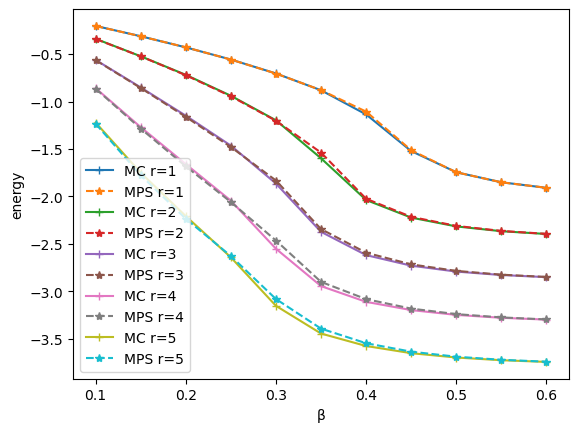

 68.118486 seconds (77.18 M allocations: 11.547 GiB, 1.41% gc time)


In [58]:
#test1
lattice = 15;               #晶格大小
Sweeps_heat = Int(1e5);       #热浴蒙卡次数
Sweeps = Int(1e5);           #蒙卡次数
βB = 0.1;                    #温度区间初始
βE = 0.6;                    #温度区间末尾
d = 0.05;                   #温度区间间隔
steps = Int(round((βE-βB)/d+1));
eMPS = zeros(steps,1); 
eMC = zeros(steps,1);
# r = 5
Ni = 3
Nj = 3
D = 20
A = Array{Array,2}(undef, Ni, Nj)
for i = 1:Ni,j = 1:Nj
    Random.seed!(1234)
    A[i,j] = randn(D, 2, D) + im*randn(D, 2, D)
end
for r in [1 2 3 4 5]
    @time begin
        Threads.@threads for i=1:steps
            β = βB+ d*(i-1)
            println("β  = $β ")
            eMC[i] = MC(lattice,β,r,Sweeps_heat,Sweeps)
            M, ME_row, ME_col,λM,λME_row,λME_col= classicalisingmpo(β; r = r)
            λ, AL, C, AR, FL3, FR3, FL4, FR4 = vumps(A, M;verbose = false, tol = 1e-30, maxiter = 10)
            eMPS[i] = real(energy(M, ME_row, ME_col, AL, C, AR, FL3,FL4, FR3, FR4,λM,λME_row, λME_col))
        end
    end
    β=βB:d:βE

#     title("r = $r")
    plot(β,eMC,"+-",label = "MC r=$r")
#     plot(β,fill(-(r*4+14)/9,steps),label = "real r=$r")
    plot(β,eMPS,"*--",label = "MPS r=$r")
    legend(loc="best")
    xlabel("β")
    ylabel("energy")
end